### Time Series Forecasting

#### Approach

1. Analysing the data visually
2. Decompose the data and check for seasonality and trend
3. If no Seasonality and trend, check for Simple Exponential, AR or MA models
4. If trend exists , check for Double Exponential, ARIMA
5. If Trend and seasonality Exists, check for Triple exponential(Holt's Winters) , SARIMA

In [1]:
import numpy as np 
import pandas as pd 
import itertools
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error




import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('train_csv.csv')
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [3]:
df.dtypes

id           int64
time        object
feature    float64
dtype: object

In [4]:
# We want the date or time to be in the form of pandas obejct

df['time']= pd.to_datetime(df['time']) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null datetime64[ns]
feature    80 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 KB


In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [8]:
df.set_index('time',inplace=True)

In [9]:
df.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


In [17]:
df.index[:5]

DatetimeIndex(['2019-03-19 00:00:00', '2019-03-19 00:00:10',
               '2019-03-19 00:00:20', '2019-03-19 00:00:30',
               '2019-03-19 00:00:40'],
              dtype='datetime64[ns]', name='time', freq=None)

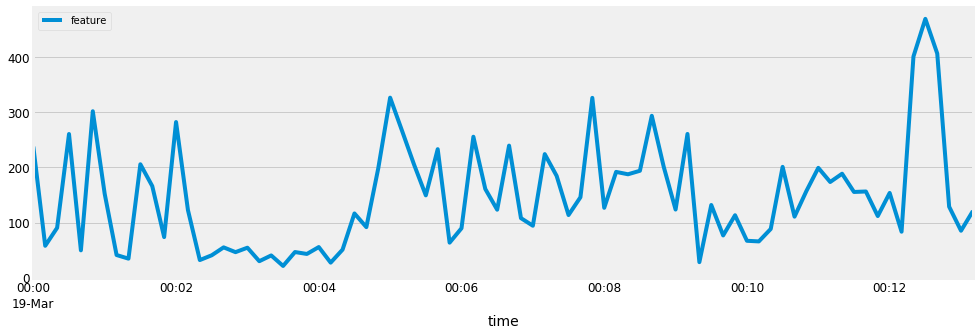

In [18]:
df.plot(figsize=(15, 5))

<font color="red"> It appears to be that there is some pattern along with Trend and Seasonality in the Data

### Lets decompose the data to check whether there is any trend and seasonality along with residual factors

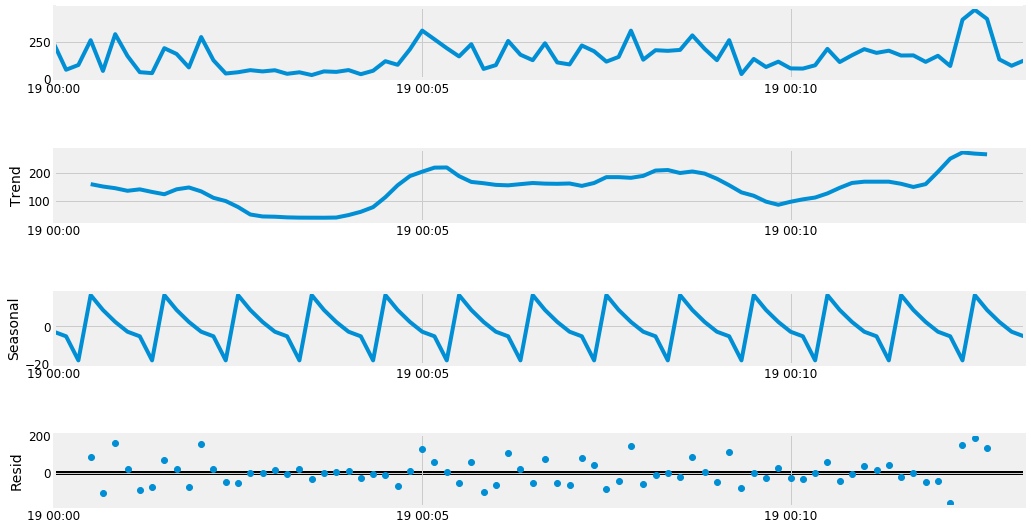

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
season = seasonal_decompose(df, period=6)
graph = season.plot();
graph.set_size_inches(16,8)

##### Observations

- Trend :There exists to be some trend which is varying in nature, but ultimately moving upwards
- Seasonality : There is a seasonal pattern seen 

### But We dont know the seasonal lenght, lets find a way to get the seasonal lenght of the given time series.  Here the Given Data is with frequecy of 10 seconds.

One way to find out the seasonality or seasonal length is ACF graph. If there is some pattern repeating over time , there will be coefficient associated with that particular seasonal time. Lets try to plot the ACF and find the possible seasonal length

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

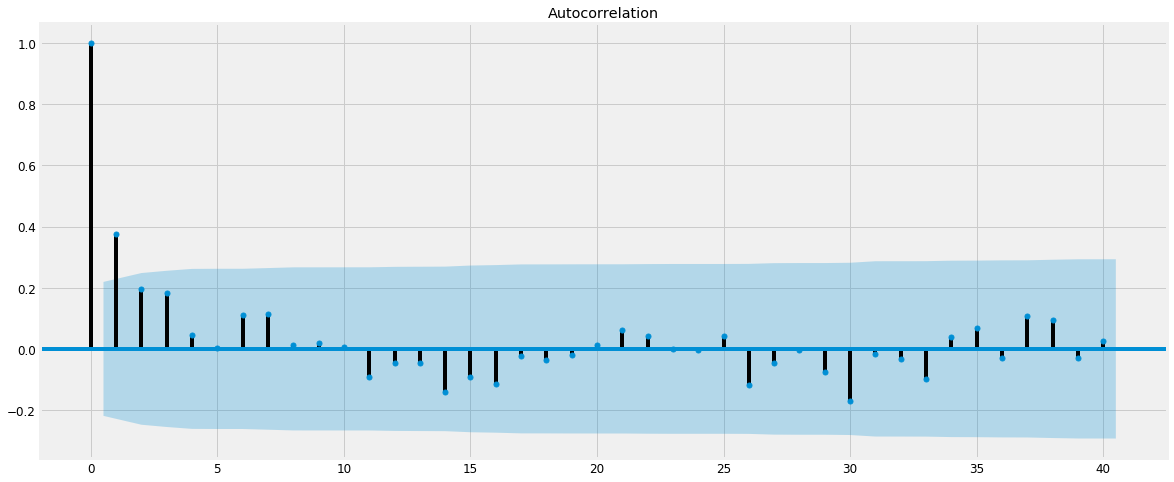

In [31]:
x=plot_acf(df, ax=pyplot.gca(),lags=40);
x.set_size_inches(18,8)

- There is no significant pattern w.r.t co-efficients is seen at any sesonal intervals, 
- we can consider the week pattern, i.e. we can see the spike at values 5 & 6. We may think that there is seasonality with respect multiples of minute or a minute

### As stated earlier, I'll be using a triple exponential model since there is trend with seasonality

- There are two variants, i.e. Additive and Mutiplicative
- Ill be using all combinations along the combination of seasonality lengths

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [217]:
dic={}
print('Iteration Starts:\n')
for i in [6,12,18]:     #the seasonal periods conidered are 6,12,18 [1,2,3 mins respectively]
    for j in ['add','mul']:
        for k in ['add','mul']:
            model = ExponentialSmoothing(df,trend=j,seasonal=k,seasonal_periods=i).fit()
            print('Value of AIC with trend:',j,',sesonality:',k, 'and seasonal period:',i,\
            'is',model.aic.round(2))
            a='Trend: '+j+' Seasonality: '+k+' with seasonal period: '+str(i)
            dic[a]=model.aic.round(2)
print('\n **********Iteration End**********')
min_val_key=min(dic.keys(), key=(lambda k: dic[k]))
print('\n The Best Model is--> ', min_val_key, 'with Akaike information criterion value of ', dic[min_val_key])

Iteration Starts:

Value of AIC with trend: add ,sesonality: add and seasonal period: 6 is 743.92
Value of AIC with trend: add ,sesonality: mul and seasonal period: 6 is 740.5
Value of AIC with trend: mul ,sesonality: add and seasonal period: 6 is 754.61
Value of AIC with trend: mul ,sesonality: mul and seasonal period: 6 is 758.0
Value of AIC with trend: add ,sesonality: add and seasonal period: 12 is 751.63
Value of AIC with trend: add ,sesonality: mul and seasonal period: 12 is 764.7
Value of AIC with trend: mul ,sesonality: add and seasonal period: 12 is 751.3
Value of AIC with trend: mul ,sesonality: mul and seasonal period: 12 is 801.88
Value of AIC with trend: add ,sesonality: add and seasonal period: 18 is 796.27
Value of AIC with trend: add ,sesonality: mul and seasonal period: 18 is 798.83
Value of AIC with trend: mul ,sesonality: add and seasonal period: 18 is 796.13
Value of AIC with trend: mul ,sesonality: mul and seasonal period: 18 is 819.52

 **********Iteration End****

### Lets validate our Model and Check the RMSE

In [236]:
pred=model.predict(start=pd.to_datetime('2019-03-19 00:05:00'),end=pd.to_datetime('2019-03-19 00:07:00'))
forecast = pred
y_act = df['feature']['2019-03-19 00:05:00':'2019-03-19 00:07:00']

#RMSE
mse = ((forecast - y_act) ** 2).mean()
rmse_ets=round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(rmse_ets))

The Mean Squared Error of our forecasts is 8669.55
The Root Mean Squared Error of our forecasts is 93.11


### To forecast the next 40 values, let us build a ETS model with parameters for trend : additive and seasonal : multiplicative and seasonal period as 6 and Visualize the Forecast

2019-03-19 00:13:20    155.153263
2019-03-19 00:13:30    211.434359
2019-03-19 00:13:40    218.773567
2019-03-19 00:13:50    164.199424
2019-03-19 00:14:00    169.669410
2019-03-19 00:14:10    179.193444
2019-03-19 00:14:20    155.153263
2019-03-19 00:14:30    211.434359
2019-03-19 00:14:40    218.773567
2019-03-19 00:14:50    164.199424
2019-03-19 00:15:00    169.669410
2019-03-19 00:15:10    179.193444
2019-03-19 00:15:20    155.153263
2019-03-19 00:15:30    211.434359
2019-03-19 00:15:40    218.773567
2019-03-19 00:15:50    164.199424
2019-03-19 00:16:00    169.669410
2019-03-19 00:16:10    179.193444
2019-03-19 00:16:20    155.153263
2019-03-19 00:16:30    211.434359
2019-03-19 00:16:40    218.773567
2019-03-19 00:16:50    164.199424
2019-03-19 00:17:00    169.669410
2019-03-19 00:17:10    179.193444
2019-03-19 00:17:20    155.153263
2019-03-19 00:17:30    211.434359
2019-03-19 00:17:40    218.773567
2019-03-19 00:17:50    164.199424
2019-03-19 00:18:00    169.669410
2019-03-19 00:

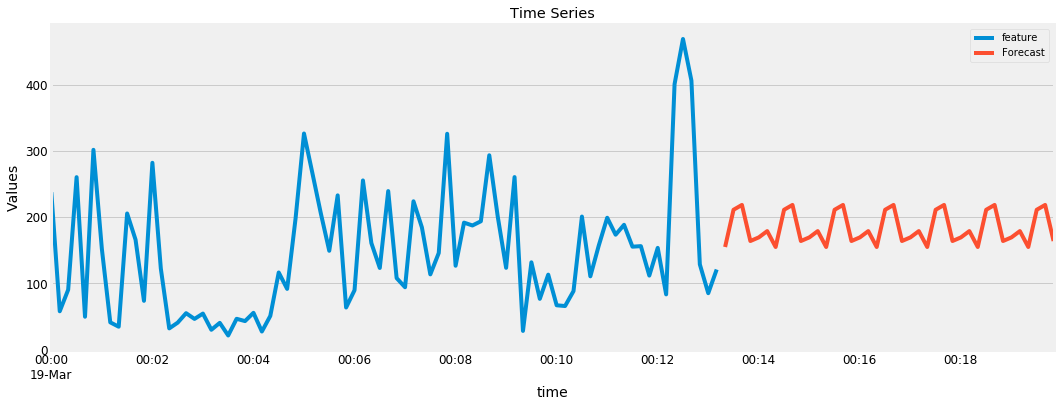

In [224]:
model = ExponentialSmoothing(df,trend='add',seasonal='mul',seasonal_periods=6).fit()
pred_ets=model.predict(start=len(df),end=len(df)+40-1)


title='Time Series'
ylabel='Values'
xlabel='time'

ax = df.plot(legend=True,figsize=(16,6),title=title)
pred_ets.plot(legend=True,label='Forecast')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
print(pred_ets)

### Now let us build a (S)ARIMA model, since our data contains seasonality and trend

Lets get an idea of what parameters P,D,Q are best for the time series 

In [136]:
## Lets check the stationarity of the data

In [137]:
#Function to check stationarity

def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean=timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used',
                                'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

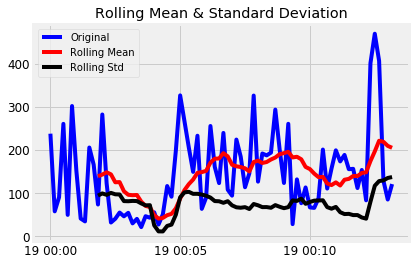

Results of Dickey-Fuller Test:
Test Statistic                -5.945866e+00
p-value                        2.205049e-07
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


In [138]:
#Lets check for the original series

test_stationarity(df)

- We can see that rolling mean & Std deviation are not constant over the time

- Lets try with differencing

In [147]:
diff_seq=(df.diff()).dropna()

In [148]:
len(diff_seq)

79

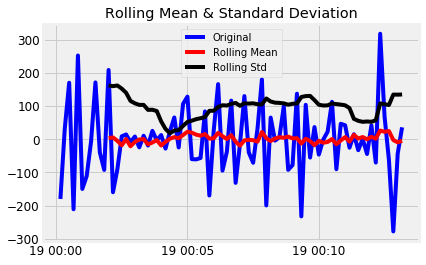

Results of Dickey-Fuller Test:
Test Statistic                -6.075385e+00
p-value                        1.124851e-07
#Lags Used                     4.000000e+00
Number of Observations Used    7.400000e+01
Critical Value (1%)           -3.521980e+00
Critical Value (5%)           -2.901470e+00
Critical Value (10%)          -2.588072e+00
dtype: float64


In [149]:
test_stationarity(diff_seq)

<font color="red"> By comparing the above graphs for series without and with difference, it feels series with single difference is more stationary. So d=1 seems to be the best value for forecasting 

Lets try to find the value of p & q using pacf and acf respectively

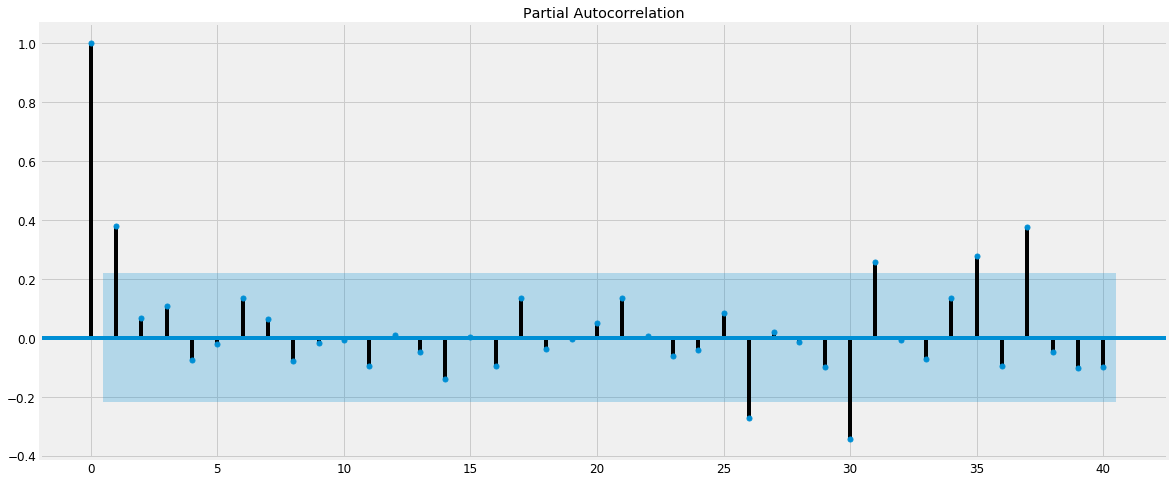

In [154]:
# PACF of non-differenced data
p1=plot_pacf(df, ax=pyplot.gca(),lags=40);
p1.set_size_inches(18,8)

We can see from the above plot, there is sharp cutoff from lag 1, which implies there are chances of under-differencing

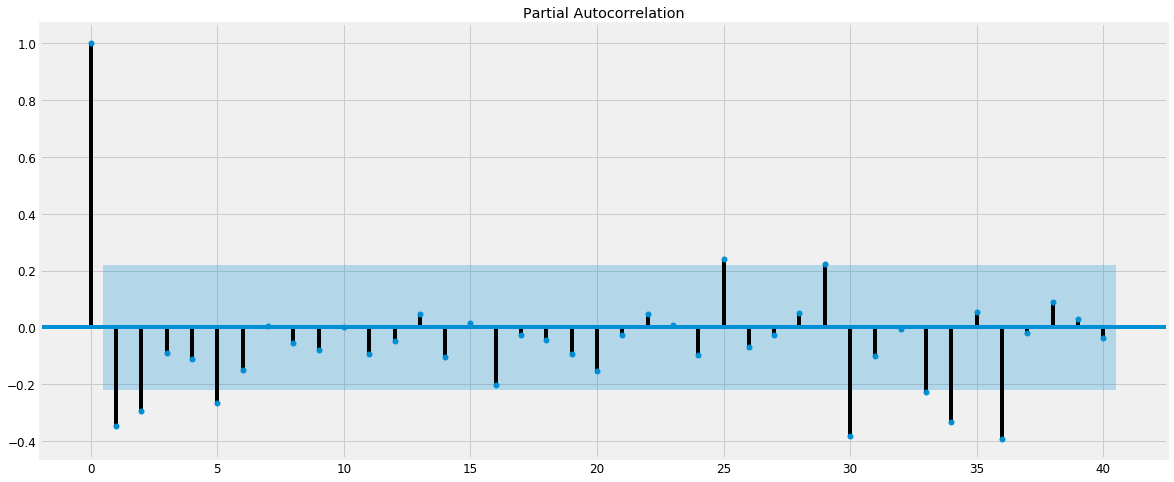

In [152]:
p1=plot_pacf(diff_seq, ax=pyplot.gca(),lags=40);
p1.set_size_inches(18,8)

Here the pacf is negative at lag-1, So lets go with order of differencing as 1

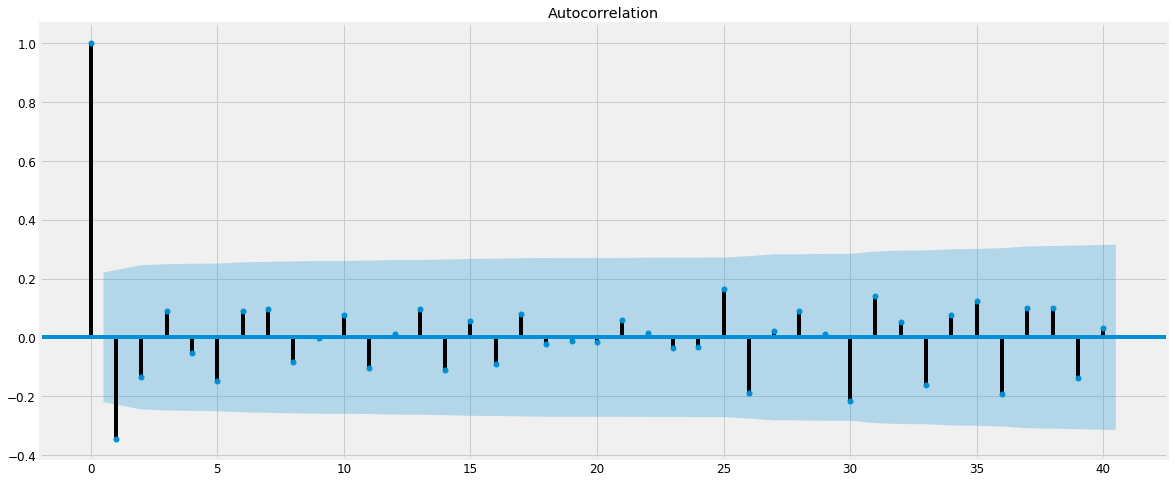

In [151]:
p2=plot_acf(diff_seq, ax=pyplot.gca(),lags=40);
p2.set_size_inches(18,8)

Negative corr ar lag 1 suggests to add 1 MA term

<font color="red"> It feels like the order for Non-Seasonal ARIMA is.

- p:1
- d:1
- q:1

For the orders of Seasonal part, let us search the right values by iterating, since the data doesnt display significant seasonality or patter, its good to search for the best values by looping

In [243]:
c=0
dic_1={}
print('Iteration Starts:\n')

for i in [6,12,18]:

    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], i) for x in list(itertools.product(p, d, q))]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(df['feature'],
                                                order=param,
                                                seasonal_order=param_seasonal,enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                c=c+1
                print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
            a=str(param)+'x'+str(param_seasonal)
            dic_1[a]=results.aic.round(2)
print('\n **********Iteration End**********')
print('\n Total Models Built:',c)
min_val_key=min(dic_1.keys(), key=(lambda k: dic_1[k]))
print('\n The Best Model is--> ', min_val_key, 'with Akaike information criterion value of ', dic_1[min_val_key])

Iteration Starts:

ARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:1042.4035372531396
ARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:935.6901250164809
ARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:904.6334671886257
ARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:819.235074683582
ARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:914.2849448117074
ARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:895.2156093905246
ARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:838.0245216532624
ARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:820.2782695450827
ARIMA(0, 0, 1)x(0, 0, 0, 6) - AIC:988.1740013827848
ARIMA(0, 0, 1)x(0, 0, 1, 6) - AIC:889.455224914896
ARIMA(0, 0, 1)x(0, 1, 0, 6) - AIC:886.6332498885117
ARIMA(0, 0, 1)x(0, 1, 1, 6) - AIC:796.9078785332523
ARIMA(0, 0, 1)x(1, 0, 0, 6) - AIC:901.929342305989
ARIMA(0, 0, 1)x(1, 0, 1, 6) - AIC:877.7855468681266
ARIMA(0, 0, 1)x(1, 1, 0, 6) - AIC:824.6408718363988
ARIMA(0, 0, 1)x(1, 1, 1, 6) - AIC:798.5417460600543
ARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:951.5451699616596
ARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:869.1963534465401
ARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:910.816314258

ARIMA(0, 1, 1)x(1, 0, 1, 18) - AIC:710.0348026539627
ARIMA(0, 1, 1)x(1, 1, 0, 18) - AIC:541.8489306120143
ARIMA(0, 1, 1)x(1, 1, 1, 18) - AIC:1569.8148690958083
ARIMA(1, 0, 0)x(0, 0, 0, 18) - AIC:959.0922663490547
ARIMA(1, 0, 0)x(0, 0, 1, 18) - AIC:734.5843986560849
ARIMA(1, 0, 0)x(0, 1, 0, 18) - AIC:763.4510592365673
ARIMA(1, 0, 0)x(0, 1, 1, 18) - AIC:1801.1955942377813
ARIMA(1, 0, 0)x(1, 0, 0, 18) - AIC:734.8640469378438
ARIMA(1, 0, 0)x(1, 0, 1, 18) - AIC:736.4958225307615
ARIMA(1, 0, 0)x(1, 1, 0, 18) - AIC:539.6129796841167
ARIMA(1, 0, 0)x(1, 1, 1, 18) - AIC:1935.36206906954
ARIMA(1, 0, 1)x(0, 0, 0, 18) - AIC:936.0091469398201
ARIMA(1, 0, 1)x(0, 0, 1, 18) - AIC:720.5708645105472
ARIMA(1, 0, 1)x(0, 1, 0, 18) - AIC:751.5444948002515
ARIMA(1, 0, 1)x(0, 1, 1, 18) - AIC:1948.698893188628
ARIMA(1, 0, 1)x(1, 0, 0, 18) - AIC:731.9590543794751
ARIMA(1, 0, 1)x(1, 0, 1, 18) - AIC:722.448529417115
ARIMA(1, 0, 1)x(1, 1, 0, 18) - AIC:541.4705773566266
ARIMA(1, 0, 1)x(1, 1, 1, 18) - AIC:1589.678928

In [244]:
#Build the model

mod = sm.tsa.statespace.SARIMAX(train['feature'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 18),enforce_stationarity=False,enforce_invertibility=False).fit()



print(mod.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1874      0.407      0.461      0.645      -0.610       0.985
ma.L1         -0.8694      0.240     -3.621      0.000      -1.340      -0.399
ar.S.L18      -0.0078      0.288     -0.027      0.978      -0.572       0.556
sigma2      9922.3682   2366.165      4.193      0.000    5284.769    1.46e+04


### Validating the predicted Values

In [245]:
pred=mod.predict(start=pd.to_datetime('2019-03-19 00:05:00'),end=pd.to_datetime('2019-03-19 00:07:00'))
forecast = pred
y_act = df['feature']['2019-03-19 00:05:00':'2019-03-19 00:07:00'] 


#RMSE
mse = ((forecast - y_act) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
rmse_sarima=round(np.sqrt(mse), 2)
print('The Root Mean Squared Error of our forecasts is {}'.format(rmse_sarima))

The Mean Squared Error of our forecasts is 9888.61
The Root Mean Squared Error of our forecasts is 99.44


2019-03-19 00:13:20    175.654543
2019-03-19 00:13:30    105.649800
2019-03-19 00:13:40    137.518084
2019-03-19 00:13:50    317.235575
2019-03-19 00:14:00    120.232463
2019-03-19 00:14:10    184.453396
2019-03-19 00:14:20    179.716768
2019-03-19 00:14:30    185.570408
2019-03-19 00:14:40    285.246632
2019-03-19 00:14:50    192.348722
2019-03-19 00:15:00    115.283336
2019-03-19 00:15:10    252.706286
2019-03-19 00:15:20     21.163071
2019-03-19 00:15:30    123.779365
2019-03-19 00:15:40     69.866232
2019-03-19 00:15:50    105.185125
2019-03-19 00:16:00     83.664923
2019-03-19 00:16:10    210.947488
2019-03-19 00:16:20    171.607926
2019-03-19 00:16:30    101.603245
2019-03-19 00:16:40    133.471501
2019-03-19 00:16:50    313.188957
2019-03-19 00:17:00    116.186000
2019-03-19 00:17:10    180.406873
2019-03-19 00:17:20    175.670219
2019-03-19 00:17:30    181.523829
2019-03-19 00:17:40    281.200046
2019-03-19 00:17:50    188.302099
2019-03-19 00:18:00    111.236762
2019-03-19 00:

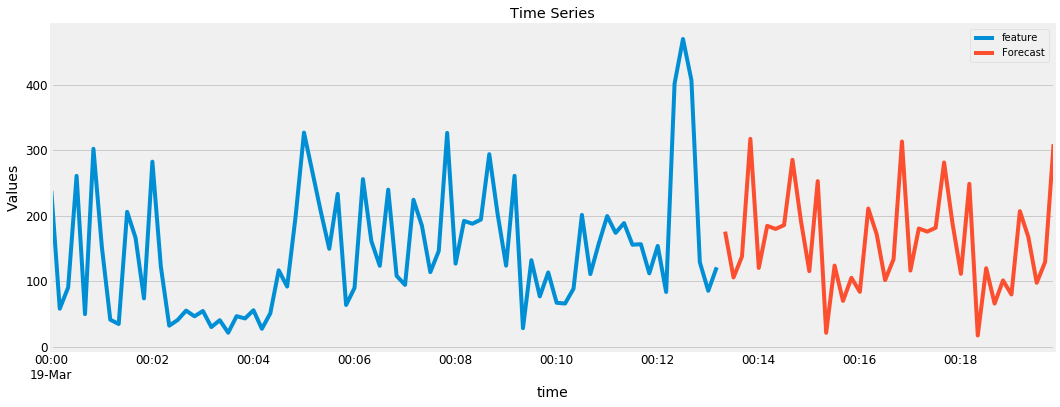

In [246]:
pred_sarima=mod.predict(start=len(df),end=len(df)+40-1)


title='Time Series'
ylabel='Values'
xlabel='time'

ax = df.plot(legend=True,figsize=(16,6),title=title)
pred_sarima.plot(legend=True,label='Forecast')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
print(pred_sarima)

## Comparing the Models

[Text(0, 0.5, 'Values'), Text(0.5, 0, 'time')]

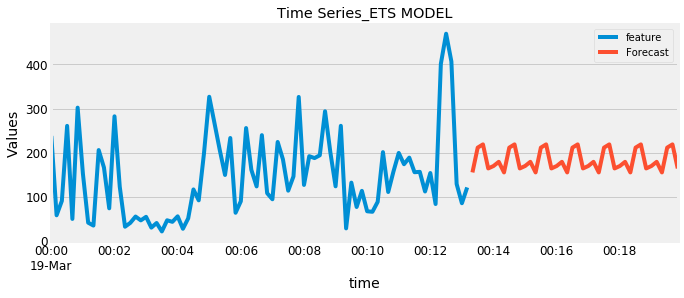

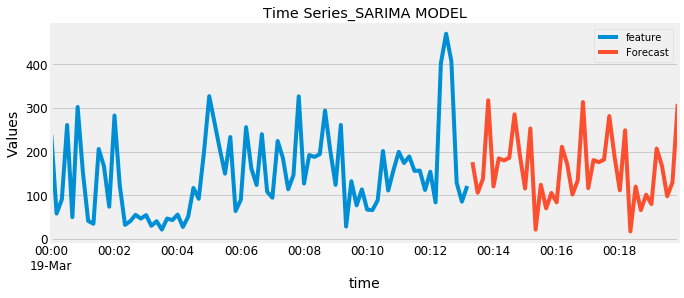

In [247]:
title='Time Series_ETS MODEL'
ylabel='Values'
xlabel='time'

ax = df.plot(legend=True,figsize=(10,4),title=title)
pred_ets.plot(legend=True,label='Forecast')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

title='Time Series_SARIMA MODEL'
ax = df.plot(legend=True,figsize=(10,4),title=title)
pred_sarima.plot(legend=True,label='Forecast')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [258]:
print('The RMSE of \nSARIMA is', rmse_sarima, '\nETS is',rmse_ets)

The RMSE of 
SARIMA is 99.44 
ETS is 93.11


By comparing the models , we can see that the RMSE of ETS model with triple exponential Smoothing is better

In [255]:
# Lets save the file with predictions from ETS(Triple exponential smoothing model)

test=pd.read_csv('test_csv.csv')
test['feature']=pred_ets.values                # Preds from ETS Model
test.to_csv("test_final.csv",index=False)